### Treść zadania

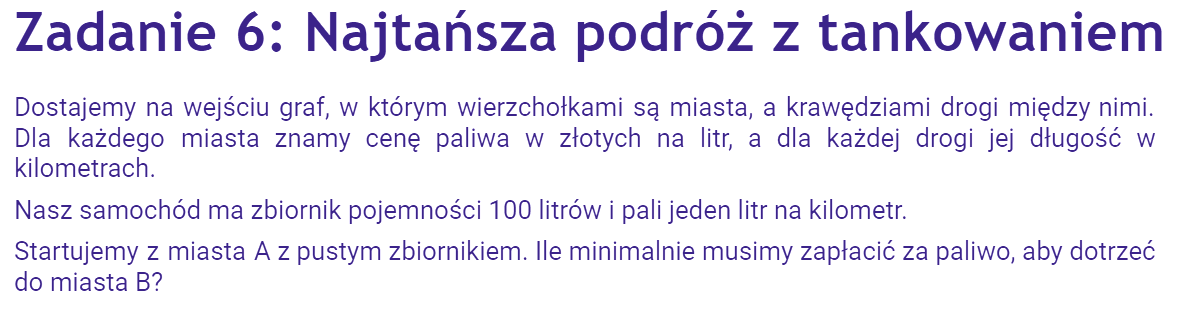

## Implementacja #1
#### (Z dodawaniem wierzchołków do grafu)

### Złożoność

###### Obliczeniowa:
$ O((101 \cdot E) \cdot log(101 \cdot V))) = O(E \cdot log(V)) $  - przy założeniu, że pojemność baku samochodu to $ 100 $ litrów (patrz treść)
###### Pamięciowa:
$ O(101 \cdot V + 101 \cdot E) = O(V + E) $  - bo tworzymy graf w postaci list sąsiedztwa

### Algorytm

In [1]:
from queue import PriorityQueue


def add_directed_edge(G: 'graph array',
                      u: 'source vertex',
                      v: 'target vertex',
                      weight: 'weight of an edge'):
    G[u].append((v, weight))


def add_vertex(G: 'graph array',
               cost: 'cost of a fuel per liter',
               reps: 'number of repeated vertices'):
    n = len(G)
    for _ in range(reps):
        G.append([])
    for i in range(1, reps):
        add_directed_edge(G, n + i - 1, n + i, cost)
    

def create_graph(V: 'array of vertices weights', 
                 E: 'array of edges and their weights',
                 capacity: "capacity of the car's tank"):
    n = len(V)
    step = capacity + 1  # We can have [0, capacity] liters inclusive
    G = []
    
    # Add vertices to the graph and edges which represent
    # refueling costs
    for i in range(n): 
        add_vertex(G, V[i], step)
    
    # Add edges between cities considering distances between
    # cities
    for e in E:
        # Get the first two vertices to connect
        u = e[0] * step + e[2]
        v = e[1] * step
        # Add edges in a loop
        for i in range(step - e[2]):
            add_directed_edge(G, u + i, v + i, 0)  # From u to v
        # Add directed edges in the opposite direction
        u = e[0] * step
        v = e[1] * step + e[2]
        # Add edges in a loop
        for i in range(step - e[2]):
            add_directed_edge(G, v + i, u + i, 0)  # From v to u
            
    return G


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target', 
             capacity: "capacity of the car's tank",
             fuel: 'initial amount of fuel'):        
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    pq = PriorityQueue()
    step = capacity + 1  # Number of vertices in each city
    s = s * step + fuel
    pq.put((0, s))

    while not pq.empty():
        min_w, u = pq.get()
        # Relax a vertex
        if min_w < weights[u]:
            weights[u] = min_w
            # Break if the target vertex was processed (one of possible targets
            # because there will be <capacity> number of vertices which correspond
            # to the target - we can finish with different amounts of fuel)
            if t * step <= u < (step + 1) * capacity: return weights[u]
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                # Add only vertices which haven't been processed yet
                if weights[v] == inf:
                    pq.put((weights[u] + weight, v))
    # If a loop wasn't broken, there is no path to the target
    return inf


def min_cost(V: 'array of vertices weights', 
             E: 'array of edges and their weights',
             capacity: "capacity of the car's tank",
             fuel: 'initial amount of fuel in a tank',
             s: 'start city index',
             t: 'target city index'):
    if fuel > capacity:
        raise ValueError('Too much fuel in a tank')
    
    G = create_graph(V, E, capacity)
    
#     print(*G, sep='\n')
    
    return dijkstra(G, s, t, capacity, fuel)

###### Kilka testów

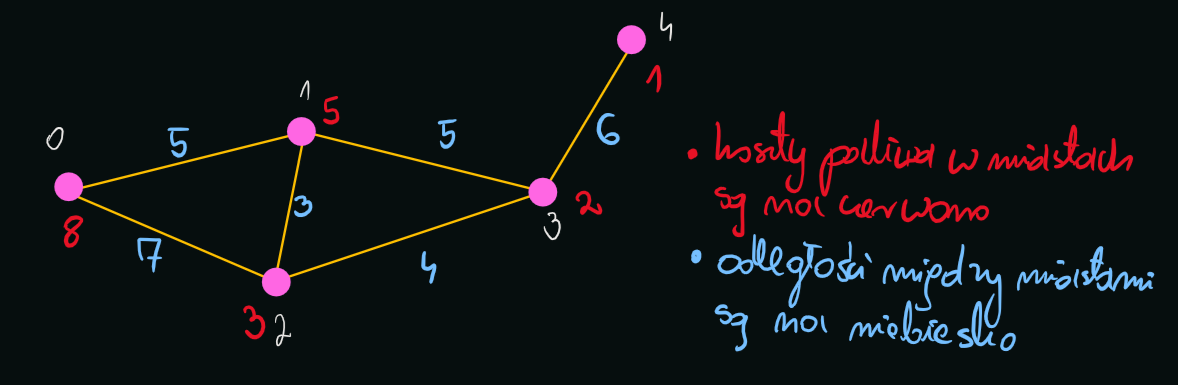

In [2]:
V = [8, 5, 3, 2, 1]
E = [(0, 1, 5), (1, 2, 3), (0, 2, 7), (2, 3, 4), (3, 4, 6)]

s = 0
t = 4
capacity = 6 # change to 100 (in this case we will also get the same result)
fuel = 0

print(min_cost(V, E, capacity, fuel, s, t))

79


In [3]:
s = 0
t = 4
capacity = 5 # change to 100 (in this case we will also get the same result)
fuel = 0

print(min_cost(V, E, capacity, fuel, s, t))

inf


### (Dodatkowo) Zwracanie ścieżki wraz z liczbą zatankowanych litrów na każdej ze stacji po drodze

In [4]:
from queue import PriorityQueue


def add_directed_edge(G: 'graph array',
                      u: 'source vertex',
                      v: 'target vertex',
                      weight: 'weight of an edge'):
    G[u].append((v, weight))


def add_vertex(G: 'graph array',
               cost: 'cost of a fuel per liter',
               reps: 'number of repeated vertices'):
    u = len(G)
    for _ in range(reps):
        G.append([])
    for i in range(1, reps):
        add_directed_edge(G, u + i - 1, u + i, cost)
    

def create_graph(V: 'array of vertices weights', 
                 E: 'array of edges and their weights',
                 capacity: "capacity of the car's tank"):
    n = len(V)
    step = capacity + 1  # We can have [0, capacity] liters inclusive
    G = []
    
    # Add vertices to the graph and edges which represent
    # refueling costs
    for i in range(n): 
        add_vertex(G, V[i], step)
    
    # Add edges between cities considering distances between
    # cities
    for e in E:
        # Get the first two vertices to connect
        u = e[0] * step + e[2]
        v = e[1] * step
        # Add edges in a loop
        for i in range(step - e[2]):
            add_directed_edge(G, u + i, v + i, 0)  # From u to v
        # Add directed edges in the opposite direction
        u = e[0] * step
        v = e[1] * step + e[2]
        # Add edges in a loop
        for i in range(step - e[2]):
            add_directed_edge(G, v + i, u + i, 0)  # From v to u
            
    return G


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target', 
             capacity: "capacity of the car's tank",
             fuel: 'initial amount of fuel'):        
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    pq = PriorityQueue()
    step = capacity + 1  # Number of vertices in each city
    s = s * step + fuel
    pq.put((0, s, None))

    while not pq.empty():
        min_w, u, parent = pq.get()
        # Relax a vertex
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            # Break if the target vertex was processed (one of possible targets
            # because there will be <capacity> number of vertices which correspond
            # to the target - we can finish with different amounts of fuel)
            if t * step <= u < (step + 1) * capacity: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                # Add only vertices which haven't been processed yet
                if weights[v] == inf:
                    pq.put((weights[u] + weight, v, u))
    # If a loop wasn't broken, there is no path
    else: return (None,) * 3
    
    return u, weights, parents


def get_path(costs, weights, parents, t, capacity):
    path = []
    
    prev = None
    while parents[t] is not None:
        u = t // (capacity + 1)
        if u != prev:
            path.append([u, weights[t] - weights[parents[t]]])
        else:
            path[-1][1] += weights[t] - weights[parents[t]]
        prev = u
        t = parents[t]
        
    for i in range(len(path)):
        path[i][1] /= costs[path[i][0]]
        if path[i][1] == int(path[i][1]):
            path[i][1] = int(path[i][1])
        
    return path[::-1]


def min_cost_path(V: 'array of vertices weights', 
                 E: 'array of edges and their weights',
                 capacity: "capacity of the car's tank",
                 fuel: 'initial amount of fuel in a tank',
                 s: 'start city index',
                 t: 'target city index'):
    if fuel > capacity:
        raise ValueError('Too much fuel in a tank')
    
    G = create_graph(V, E, capacity)
    end_vertex, weights, parents = dijkstra(G, s, t, capacity, fuel)
    return end_vertex and get_path(V, weights, parents, end_vertex, capacity)

###### Kilka testów

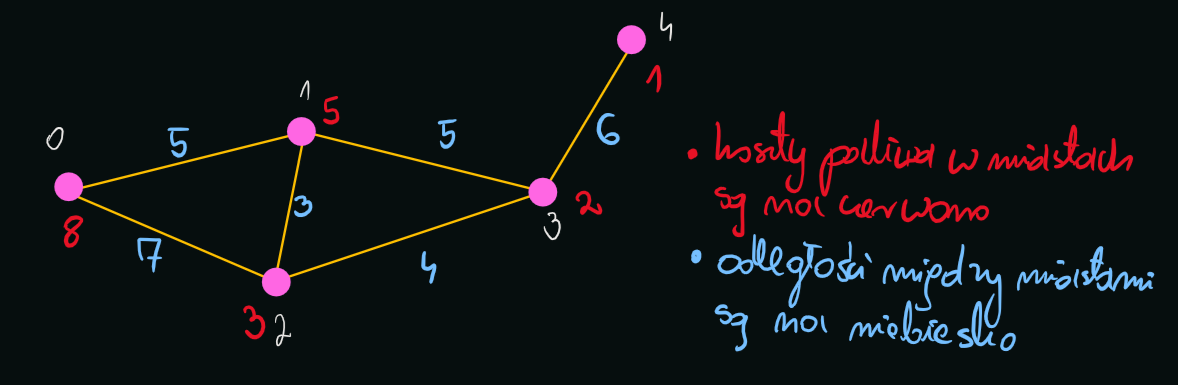

In [5]:
V = [8, 5, 3, 2, 1]
E = [(0, 1, 5), (1, 2, 3), (0, 2, 7), (2, 3, 4), (3, 4, 6)]

def test(s, t, capacity, fuel):
    path = min_cost_path(V, E, capacity, fuel, s, t)
    if path:
        total = 0
        for ind, liters in path:
            total += V[ind] * liters
            print(f'Refueled {liters} liters in {ind} city for ${V[ind]} per liter (total cost: ${V[ind] * liters})')
        print(f'Total cost: ${total}')
    elif path is not None:
        print('Target point is the same as starting point')
    else:
        print('Impossible to reach the target')

In [6]:
test(s=0, t=4, capacity=5, fuel=0)

Impossible to reach the target


In [7]:
test(s=0, t=2, capacity=5, fuel=0)

Refueled 5 liters in 0 city for $8 per liter (total cost: $40)
Refueled 3 liters in 1 city for $5 per liter (total cost: $15)
Refueled 0 liters in 2 city for $3 per liter (total cost: $0)
Total cost: $55


In [8]:
test(s=0, t=4, capacity=10, fuel=0)

Refueled 5 liters in 0 city for $8 per liter (total cost: $40)
Refueled 3 liters in 1 city for $5 per liter (total cost: $15)
Refueled 4 liters in 2 city for $3 per liter (total cost: $12)
Refueled 6 liters in 3 city for $2 per liter (total cost: $12)
Refueled 0 liters in 4 city for $1 per liter (total cost: $0)
Total cost: $79


In [9]:
test(s=4, t=4, capacity=5, fuel=0)

Target point is the same as starting point


## Implementacja #2
#### (Ze stworzeniem tablicy wierzchołków, do których możemy dotrzeć, w każdym z wierzchołków)
##### (Sposób omówiony w powyższym wideo, ale później)

### Złożoność

###### Obliczeniowa:
$ O((101 \cdot E) \cdot log(101 \cdot V))) = O(E \cdot log(V)) $  - przy założeniu, że pojemność baku samochodu to $ 100 $ litrów (patrz treść)
###### Pamięciowa:
$ O(101 \cdot V) = O(V) $  - bo tworzymy tylko tablicę dla każdego wierzchołka, a nie nowy graf

### Uwagi

Ten algorytm jest lepszym wyborem, gdy dostajemy już istniejący graf na wejściu i nie chcemy tworzyć nowego grafu. Poza tym, wymaga on również mniej pamięci i jest mniej skomplikowany. Konieczna jest jednak modyfikacja relaksacji w algorytmie Dijkstry. Algorytm można porównać do algorytmu dynamicznego, który spamiętuje, jaki jest minimalny koszt dotarcia do danego wierzchołka, mając (po dotarciu) określoną liczbę pozostałych litrów paliwa. (Podobny problem, jaki mieliśmy w przypadku zadania z żabem Zbigniewem: <a href="../5. Zajęcia/Zadanie 3. (Skoki żaba Zbigniewa po osi liczbowej).ipynb">TUTAJ</a>). W implementacji najlepiej stworzyć jedną 2-wymiarową tablicę o rozmiarze $ V \times 101 $, w której: <br>
$ F[v][i] $ - minimalny koszt dotarcia do wierzchołka $ v $, mając $ i $ pozostałych litrów paliwa
###### UWAGA:
Ponieważ nie chcemy uzyskać złożoności obliczeniowej $ O(V \cdot E) $, musimy w sprytny sposób przetwarzać wierzchołki. W tym celu, zamiast sprawdzać za każdym razem wszystkie wierzchołki sąsiadów (ich całe tablice), będziemy wypełniać jedynie pola wcześniej niewypełnione. Takie pola mogą znaleźć się jedynie dalej w tablicy, tj. dla większej ilości pozostałego paliwa, ponieważ np. później mogliśmy dotrzeć krótszą krawędzią do danego wierzchołka, lecz poruszając się ścieżką o większym sumarycznym koszcie.

### Algorytm

In [10]:
from queue import PriorityQueue


def dijkstra_dp(G: 'graph represented by adjacency lists', s: 'source', t: 'target', 
                capacity: "capacity of the car's tank",
                init_fuel: 'initial amount of fuel'):        
    n = len(G)
    inf = float('inf')
    F = [[inf] * (capacity + 1) for _ in range(n)]
    ind = [0] * n  # Store indices of not relaxed field in an F array for each vertex
    pq = PriorityQueue()
    pq.put((0, -init_fuel, s))
    
    while not pq.empty():
        min_cost, fuel, u = pq.get()
        fuel *= -1  # More fuel = better (so we will store negative fuels in a min priority queue)
        if min_cost < F[u][fuel]:
            F[u][fuel] = min_cost
            if u == t: return F[t][fuel]
            for v, distance in G[u][1]:
                # Loop over all the possible amounts of fuel refueled
                # (there might be a situation when we have enough fuel or we have to refuel)
#                 print(u, v, max(0, distance - fuel), capacity + 1 - fuel)
                for refueled in range(max(0, distance - fuel), capacity - fuel + 1):
                    # If haven't relaxed a vertex before
                    new_fuel = fuel + refueled - distance
                    if F[v][new_fuel] == inf:
                        pq.put((min_cost + refueled * G[u][0], -new_fuel, v))

###### Kilka testów

##### Pomocnicze: (uznajemy, że taki graf dostajemy na wejściu)

In [11]:
def create_graph(V: 'array of vertices costs', E: 'array of edges'):
    n = len(V)
    # Create a graph
    G = [[V[i], []] for i in range(n)]
    for e in E:
        G[e[0]][1].append((e[1], e[2]))
        G[e[1]][1].append((e[0], e[2]))
    return G

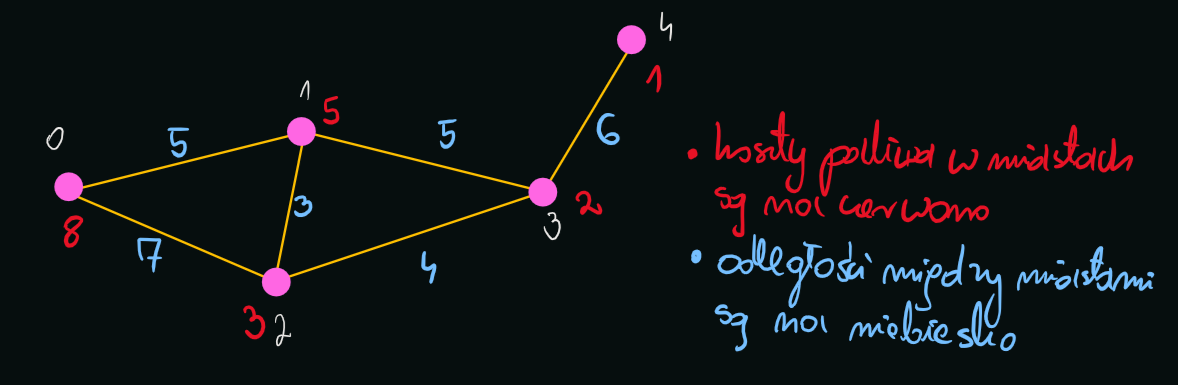

In [12]:
V = [8, 5, 3, 2, 1]
E = [(0, 1, 5), (1, 2, 3), (0, 2, 7), (2, 3, 4), (3, 4, 6)]
G = create_graph(V, E)
print(*G, sep='\n')

s = 0
t = 4
capacity = 10
fuel = 0

print(dijkstra_dp(G, s, t, capacity, fuel))

[8, [(1, 5), (2, 7)]]
[5, [(0, 5), (2, 3)]]
[3, [(1, 3), (0, 7), (3, 4)]]
[2, [(2, 4), (4, 6)]]
[1, [(3, 6)]]
79


### (Dodatkowo) Odtwarzanie znalezionej ścieżki oraz kosztów tankowania

In [13]:
from queue import PriorityQueue


def dijkstra_dp(G: 'graph represented by adjacency lists', s: 'source', t: 'target', 
                capacity: "capacity of the car's tank",
                init_fuel: 'initial amount of fuel'):        
    n = len(G)
    inf = float('inf')
    F = [[inf] * (capacity + 1) for _ in range(n)]
    P = [[None] * (capacity + 1) for _ in range(n)]  # Array of parents vertices
    ind = [0] * n  # Store indices of not relaxed field in an F array for each vertex
    pq = PriorityQueue()
    pq.put((0, -init_fuel, s, None, 0))
    
    res_fuel = None
    
    while not pq.empty():
        min_cost, fuel, u, parent, prev_fuel = pq.get()
        fuel *= -1  # More fuel = better (so we will store negative fuels in a min priority queue)
        if min_cost < F[u][fuel]:
            F[u][fuel] = min_cost
            P[u][fuel] = (parent, prev_fuel)
            if u == t: 
                res_fuel = fuel
                break
            for v, distance in G[u][1]:
                # Loop over all the possible amounts of fuel refueled
                # (there might be a situation when we have enough fuel or we have to refuel)
                for refueled in range(max(0, distance - fuel), capacity - fuel + 1):
                    # If haven't relaxed a vertex before
                    new_fuel = fuel + refueled - distance
                    if F[v][new_fuel] == inf:
                        pq.put((min_cost + refueled * G[u][0], -new_fuel, v, u, fuel))
                        
    return (res_fuel, F, P) if res_fuel is not None else (None,) * 3


def get_path(G, P, F, t, res_fuel):
    path = [(t, 0)]
    u = t
    fuel = res_fuel
    
    while True:
        prev_cost = F[u][fuel]
        u, fuel = P[u][fuel]
        if u is None: break
        refueled = (prev_cost - F[u][fuel]) / G[u][0]
        if refueled == int(refueled):
            refueled = int(refueled)
        path.append((u, refueled))
        
    path.reverse()
    return path
        

def cheapest_route(G: 'graph represented by adjacency lists', s: 'source', t: 'target', 
                capacity: "capacity of the car's tank",
                init_fuel: 'initial amount of fuel'):
    res_fuel, F, P = dijkstra_dp(G, s, t, capacity, init_fuel)
    if res_fuel is not None:
        return F[t][res_fuel], get_path(G, P, F, t, res_fuel)
    return float('inf'), None

###### Kilka testów

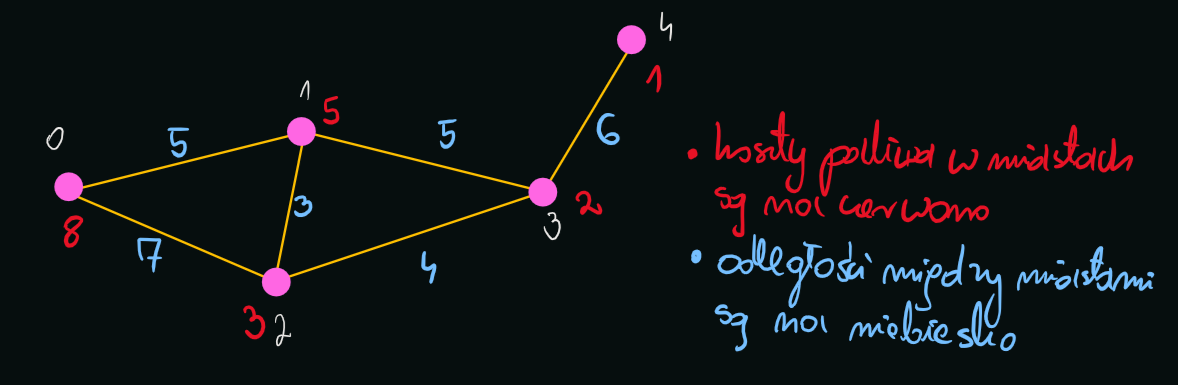

In [14]:
V = [8, 5, 3, 2, 1]
E = [(0, 1, 5), (1, 2, 3), (0, 2, 7), (2, 3, 4), (3, 4, 6)]
G = create_graph(V, E)

s = 0
t = 4
capacity = 10
fuel = 0

print(cheapest_route(G, s, t, capacity, fuel))

(79, [(0, 5), (1, 3), (2, 4), (3, 6), (4, 0)])


## Implementacja #3
#### (Ze stworzeniem tablicy wierzchołków, do których możemy dotrzeć, w każdym z wierzchołków)
##### (Dla macierzowej reprezentacji grafu z odtwarzaniem ścieżki)

In [15]:
class Node:
    def __init__(self, vert=None, idx=None):
        self.vert = vert
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(n: 'number of vertices', 
                           reps: "number of each vertex's repetitions"):
    head = Node()
    tail = head
    for u in range(n):
        for i in range(reps): 
            tail.next = Node(u, i)
            tail = tail.next
    return head


def get_min_weight_vertices(head, weights):
    if not head.next: return []  # If no more vertices are remaining
    
    # Find all vertices with the lowest distance paths
    res = []
    min_w = float('inf')
    prev = head
    
    while prev.next:
        if weights[prev.next.vert][prev.next.idx] < min_w:
            min_w = weights[prev.next.vert][prev.next.idx]
            res = [prev]
        elif weights[prev.next.vert][prev.next.idx] == min_w:
            res.append(prev)
        prev = prev.next
        
    # Remove nodes found and store vertex-index pairs
    for i in range(len(res) - 1, -1, -1):
        prev = res[i]
        res[i] = prev.next.vert, prev.next.idx
        prev.next = prev.next.next
    
    return res


def dijkstra_dp(G: 'graph represented by adjacency matrix', 
                C: 'array of fuel costs on stations',
                s: 'source', t: 'target', 
                capacity: "capacity of the car's tank",
                init_fuel: 'initial amount of fuel'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    step = capacity + 1
    to_process = vertices_to_process_ll(n, step)
    parents    = [[None] * step for _ in range(n)]
    weights    = [[inf] * step for _ in range(n)]
    weights[s][init_fuel] = 0
    
    found_res = False
    res_fuel = -inf
    
    # Loop till there are some vertices which haven't been processed yet
    while not found_res:
        # Find a vertex of the minimum total weight path
        vert = get_min_weight_vertices(to_process, weights)
        # Loop over all the vertices with shortest paths
        for u, fuel in vert:
            # If we reached the target, we must have found the shortest path
            # (or exhausted all shortest paths vertices and there is no path)
            if u == t:
                # If there is no path (the shortest path has a length infinity)
                if weights[u][fuel] == inf: return (None,) * 3
                res_fuel = fuel
                found_res = True
            # Iterate over the vertex's neighbours and update weights of the paths
            for v in range(n):
                dist = G[u][v]
                # Skip if no edge (-1 means not edge)
                if dist == -1: continue
                # Iterate over possible amounts of fuel we have to refuel in order
                # to reach the v vertex and update shortest paths
                for refueled in range(max(0, dist - fuel), capacity - fuel + 1):
                    new_fuel = fuel + refueled - dist
                    cost = refueled * C[u]
                    if weights[u][fuel] + cost < weights[v][new_fuel]:
                        weights[v][new_fuel] = weights[u][fuel] + cost
                        parents[v][new_fuel] = u, fuel
                
    return res_fuel, weights, parents


def get_path(C, parents, weights, t, res_fuel):
    path = [(t, 0)]
    fuel = res_fuel
    
    entry = parents[t][fuel]
    while entry:
        prev_cost = weights[t][fuel]
        t, fuel = entry
        refueled = (prev_cost - weights[t][fuel]) / C[t]
        if refueled == int(refueled):
            refueled = int(refueled)
        path.append((t, refueled))
        entry = parents[t][fuel]
        
    path.reverse()
    return path
        

def cheapest_route(G: 'graph represented by adjacency matrix', 
                   C: 'array of fuel costs on stations',
                   s: 'source', t: 'target', 
                   capacity: "capacity of the car's tank",
                   init_fuel: 'initial amount of fuel'):
    res_fuel, weights, parents = dijkstra_dp(G, C, s, t, capacity, init_fuel)
    if res_fuel is not None:
        return weights[t][res_fuel], get_path(C, parents, weights, t, res_fuel)
    return float('inf'), None

###### Kilka testów

##### Pomocnicze

In [16]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[-1] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G

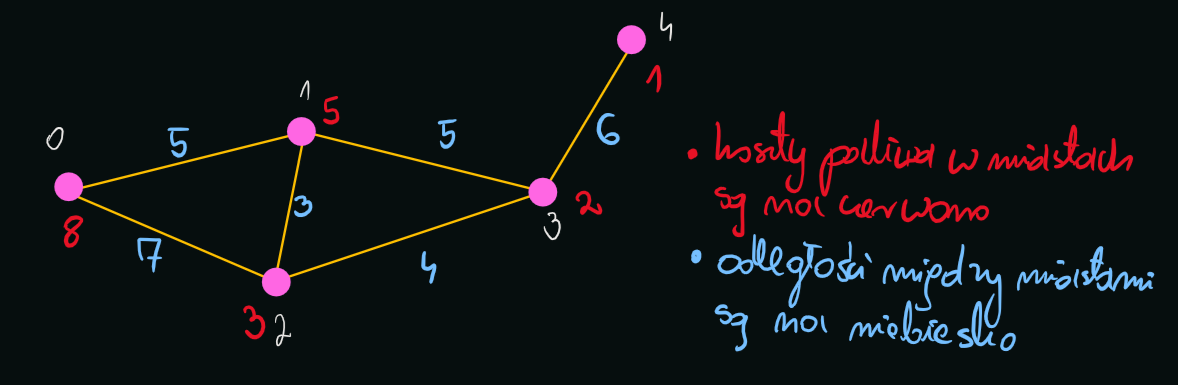

In [17]:
C = [8, 5, 3, 2, 1]
E = [(0, 1, 5), (1, 2, 3), (0, 2, 7), (2, 3, 4), (3, 4, 6)]
G = undirected_weighted_graph_matrix(E)

In [18]:
s = 0
t = 4
capacity = 10
fuel = 0

print(cheapest_route(G, C, s, t, capacity, fuel))

(79, [(0, 5), (1, 3), (2, 4), (3, 6), (4, 0)])


In [19]:
s = 0
t = 4
capacity = 5
fuel = 2

print(cheapest_route(G, C, s, t, capacity, fuel))

(inf, None)
